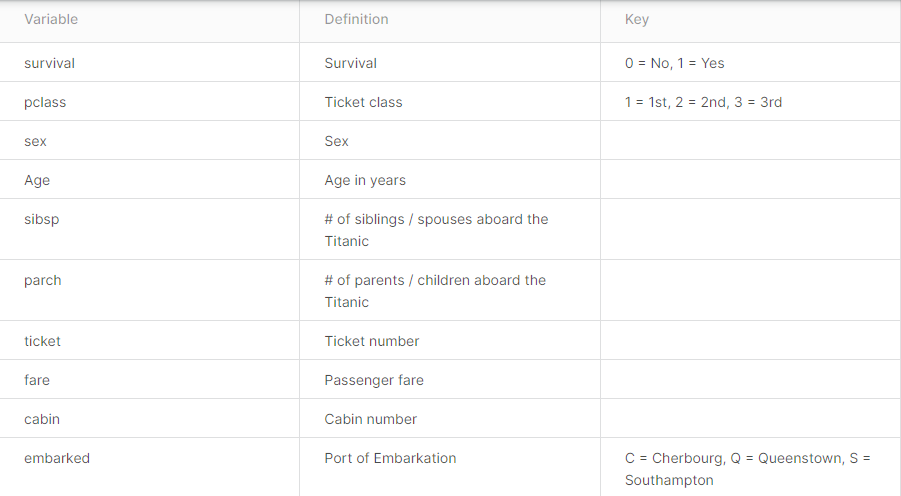

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [56]:
def embarked_to_id(x):
    if x == 'C':
        return 0
    elif x == 'Q':
        return 1
    else:
        return 2

In [5]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
gender_submission_data = pd.read_csv('data/gender_submission.csv')

In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [29]:
train_data['Sex'].value_counts() / len(train_data)

1    0.647587
0    0.352413
Name: Sex, dtype: float64

In [35]:
train_data[train_data['Survived'] == 1]['Sex'].value_counts() / len(train_data[train_data['Survived'] == 1])

0    0.681287
1    0.318713
Name: Sex, dtype: float64

In [17]:
train_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [ ]:
train_data['Age'].describe()

<AxesSubplot:xlabel='Age', ylabel='Count'>

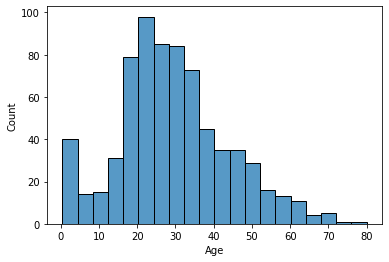

In [41]:
sns.histplot(data=train_data, x="Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

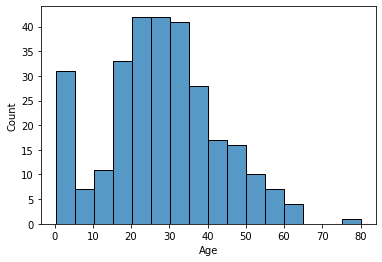

In [48]:
sns.histplot(data=train_data[train_data['Survived'] == 1], x="Age")

In [58]:
train_data['Embarked'] = train_data['Embarked'].apply(embarked_to_id)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

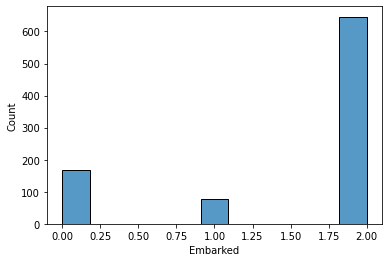

In [59]:
sns.histplot(data=train_data, x="Embarked")

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

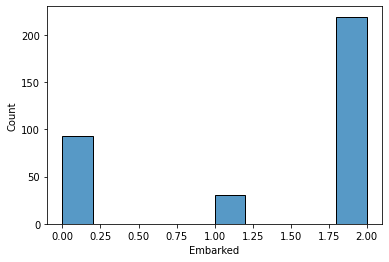

In [60]:
sns.histplot(data=train_data[train_data['Survived'] == 1], x="Embarked")

In [65]:
for i in train_data['Cabin']:
    print(i)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

## O que estou descobrindo:

Aparentemente quem ganhava mais, tinha uma chance maior de sobreviver. (matriz de correlação olhando relação entre survived e Fare/Pclass).

Aparentemente mulheres sobreviveram mais que os homens.

Aparentemente idade não é um dado útil, ele mantem o mesmo padrão para quem sobreviveu ou não.

O local onde eles embarcaram aparenta não refletir na variável target.

As cabines tem um grande potencial de serem boas para o modelo, entretanto, existem muitos valores faltantes.